## Description
### Context
A new cancer treatment for solid tumours (Miraculon-B) is in development at GSK, data has 
been collected in our recent clinical trial comparing Miraculon-B to the current standard of 
care (i.e., referred to as the ‘control’). The trial has completed, and we need your help to
analyse the data and assess the effectiveness of Miraculon-B. To do this we need you to 
compare Miraculon-B to the standard of care, and explore how different patient sub-groups
may benefit differently from treatment.

## Objective

To examine and analyse the data provided to understand which subgroups of 
patients are benefiting more from the treatment. 

## Task:
- Do patients that take the GSK drug respond more to treatment compared to those in the control group? 
- Can the age, weight or protein concentration of patients predict whether they will respond better to treatment or not?
- Additional Task: Build a Supervised Machine Learning model that can predict whether a patient will respond to a treatment or not.



## Data Description

The dataset clinical-study.csv contains 772 rows (patients) and 7 columns (variables). The 
“response” column is our target showing whether the patient has responded to treatment 
(“Yes”) or not (“No”). In solid tumours, response is based on whether tumours shrink, stay the 
same, or get bigger. If a patient has a tumour that is shrinking, they are classified as 
responder, if they have a tumour that stays the same or gets bigger, they are classified as 
non-responder. Again, please note that this is not real GSK data, but it is similar to the type of 
data and the type of questions we explore every day!
The dataset protein-levels.csv contains 768 rows and 2 columns, The protein_concentration
column shows the concentration of a protein that has been identified as a potential 
predictive biomarker for solid tumours. Predictive cancer biomarkers can be used to identify 
the patients who are or who are not likely to derive benefit from specific therapeutic 
approaches. In this analysis we want to investigate whether the concentration of the protein 
could predict whether the patient will respond or not to treatment. 

## Data Dictionary

- subject_id: Patient ID
- sex: Whether the patient is male or female
- age: The age of the patient 
- weight: The weight of the patient 
- height: The height of the patient
- trt_grp: Whether the patient is receiving the new drug or the standard of care (control)
- Response: Whether the patient responded or not (Yes[Y]/No [N])



## Importing libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
# Loading and Creating Instances of the datasets:
clinical_data = pd.read_csv('clinical-study.csv')
protein_data = pd.read_csv('protein-levels.csv')

In [3]:
# Creating a copy as backup:
clinical_copy = clinical_data.copy()
protein_copy = protein_data.copy()

In [4]:
clinical_copy

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N
1,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N
2,SUBJ_002,47.000,Female,71.210,1.64000,DRUG,Y
3,SUBJ_003,48.000,Female,69.850,1.73000,CONTROL,N
4,SUBJ_004,59.000,Female,62.940,1.50000,DRUG,Y
...,...,...,...,...,...,...,...
767,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y
768,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N


In [5]:
# Displaying first 5 entries:
clinical_copy.rename(columns={'subject_id':'patient_id'},inplace=True)
clinical_copy.head()

,patient_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


In [6]:
# First 5 entries:
protein_copy.head()

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


In [7]:
# Renaming the "id" column to "patient_id":
protein_copy.rename(columns={'participant_id':'patient_id'},inplace=True)
protein_copy.head()

,patient_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


### Exploratory Data Analysis:

In [8]:
# checking the data structure:
protein_copy.shape

(768, 2)

In [9]:
clinical_copy.shape

(772, 7)

- Clinical data had more entries (772 entries) than the protein data (768 entries) indicating possible duplicates.
- Clinical data had 4 entries more. This indicates posible duplicates and will be used subsequently to treat duplicates.

In [10]:
clinical_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  772 non-null    object 
 1   age         772 non-null    float64
 2   sex         772 non-null    object 
 3   weight      761 non-null    float64
 4   height      772 non-null    float64
 5   trt_grp     772 non-null    object 
 6   RESPONSE    772 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.3+ KB


In [11]:
clinical_copy.isna().sum()

patient_id     0
age            0
sex            0
weight        11
height         0
trt_grp        0
RESPONSE       0
dtype: int64

- Weight feature has 11 missing values.

In [12]:
# Checking for wrong entries:
clinical_copy.tail()

,patient_id,age,sex,weight,height,trt_grp,RESPONSE
767,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y
768,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N
771,SUBJ_A71,7.854,Male,23.176,1.26343,CONTROL,N


- ID misspelt as SUBJ_A69, SUBJ_A70 and SUBJ_A71. 

In [13]:
protein_copy.tail()

,patient_id,protein_concentration
763,SUBJ_764,101.0
764,SUBJ_765,122.0
765,SUBJ_766,121.0
766,SUBJ_767,126.0
767,SUBJ_768,93.0


In [14]:
protein_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             768 non-null    object 
 1   protein_concentration  763 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.1+ KB


In [15]:
protein_copy.isna().sum()

patient_id               0
protein_concentration    5
dtype: int64

- protein concentration contains 5 missing values.

### Data Preprocessing and Cleaning:

In [16]:
# Replacing wrong entries:
clinical_copy.replace(['SUBJ_A69', 'SUBJ_A70','SUBJ_A71'],['SUBJ_769', 'SUBJ_770','SUBJ_771'],inplace=True)

In [17]:
clinical_copy.tail()

,patient_id,age,sex,weight,height,trt_grp,RESPONSE
767,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y
768,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y
769,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N
770,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N
771,SUBJ_771,7.854,Male,23.176,1.26343,CONTROL,N


- Patient_id corrected.

#### Checking for Duplicates:

In [18]:
clinical_copy[clinical_copy.duplicated()]

,patient_id,age,sex,weight,height,trt_grp,RESPONSE
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N


- As earlier seen in previous cells above, clinical data had 4 roles more than tha protein concentration data. Since both will be merged, the protein concentration data will be used as basis. Hence, the need to treat the clinical data for duplicates and also drop the excess rows using the participant ID in protein concenrtration data as baseline.

##### Treating duplicates in the clinical_data:

In [19]:
clinical_copy[clinical_copy.duplicated()]

,patient_id,age,sex,weight,height,trt_grp,RESPONSE
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N


- 'SUBJ_001 had duplicates.

In [20]:
# Dropping the duplicate:
clinical_copy = clinical_copy.drop_duplicates(keep='first')

# Resetting the index:
clinical_copy.reset_index(drop=True,inplace=True)

clinical_copy

,patient_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N
1,SUBJ_002,47.000,Female,71.210,1.64000,DRUG,Y
2,SUBJ_003,48.000,Female,69.850,1.73000,CONTROL,N
3,SUBJ_004,59.000,Female,62.940,1.50000,DRUG,Y
4,SUBJ_005,59.000,Female,113.910,1.63000,CONTROL,N
...,...,...,...,...,...,...,...
766,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y
767,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y
768,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N
769,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N


#### Merging the two data:

In [21]:
merged_data = pd.merge(clinical_copy, protein_copy, on='patient_id', how='left')

In [22]:
merged_data

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N,148.0
1,SUBJ_002,47.000,Female,71.210,1.64000,DRUG,Y,85.0
2,SUBJ_003,48.000,Female,69.850,1.73000,CONTROL,N,183.0
3,SUBJ_004,59.000,Female,62.940,1.50000,DRUG,Y,89.0
4,SUBJ_005,59.000,Female,113.910,1.63000,CONTROL,N,137.0
...,...,...,...,...,...,...,...,...
766,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y,126.0
767,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y,93.0
768,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N,NaN
769,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N,NaN


In [23]:
merged_data.isna().sum()

patient_id                0
age                       0
sex                       0
weight                   11
height                    0
trt_grp                   0
RESPONSE                  0
protein_concentration     8
dtype: int64

- Null values in weight and protein concentration.

### Treating the null values:

#### 1. Weight:

In [24]:
# Data containing null weight values:
weight_null_data = merged_data.loc[merged_data['weight'].isna()]
weight_null_data

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
9,SUBJ_010,73.0,Female,NaN,1.64,DRUG,Y,125.0
49,SUBJ_050,65.0,Male,NaN,1.71,DRUG,N,105.0
60,SUBJ_061,61.0,Male,NaN,1.79,CONTROL,N,84.0
81,SUBJ_082,65.0,Male,NaN,1.78,CONTROL,N,74.0
145,SUBJ_146,56.0,Female,NaN,1.57,CONTROL,N,102.0
371,SUBJ_372,67.0,Female,NaN,1.62,CONTROL,N,118.0
426,SUBJ_427,66.0,Male,NaN,1.83,CONTROL,N,94.0
494,SUBJ_495,60.0,Female,NaN,1.65,CONTROL,N,80.0
522,SUBJ_523,62.0,Female,NaN,1.60,DRUG,N,114.0
684,SUBJ_685,74.0,Male,NaN,1.81,CONTROL,N,136.0


In [25]:
#merged_data_weight = merged_data.drop(merged_data[merged_data['weight'].isna()].index)
#merged_data_weight

In [26]:
# Data set without null weight values:
merged_data_clean = merged_data.dropna()
merged_data_clean

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0
...,...,...,...,...,...,...,...,...
763,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,101.0
764,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,122.0
765,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,121.0
766,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,126.0


#### Building a regression model to predict the null values in weight using all other parameters:

In [27]:
#Importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#### Creating an instance of the regressors:

In [28]:
#Creating an instance of regressors:

#linear regression
linear_model = LinearRegression()

#Support Vector Regressor
svr_model = SVR()

#Random Forest Regressor
rnd_forest_model = RandomForestRegressor()

knn = KNeighborsRegressor()

grad_boost = GradientBoostingRegressor()

ridge = Ridge()

In [29]:
# Function to build and train model:
def building_model(model,Xtrain_data,X_data,Ytrain_data):
    model.fit(Xtrain_data,Ytrain_data)
    prediction = model.predict(X_data)
    return prediction

In [30]:
# Function to measure model performance:
def performance_evaluation(prediction_train,prediction_test,Ytest_data,Ytrain_data):
    # The mean absolute error
    mean_abs_test = mean_absolute_error(Ytest_data,prediction_test)
    # The mean squared error
    mean_squared_test = mean_squared_error(Ytest_data,prediction_test)
    
    
    mean_abs_train = mean_absolute_error(Ytrain_data,prediction_train)
    # The mean squared error
    mean_squared_train = mean_squared_error(Ytrain_data,prediction_train)

    perform_eval = pd.DataFrame({'MAE':[f'{mean_abs_train:.2f}',f'{mean_abs_test:.2f}'],\
                                 'MSE':[f'{mean_squared_train:.2f}',f'{mean_squared_test:.2f}'],\
                                 'RMSE':[f'{np.sqrt(mean_squared_train):.2f}',f'{np.sqrt(mean_squared_train):.2f}'],\
                               'R2_Score':[f'{r2_score(Ytrain_data,prediction_train):.2f}',f'{r2_score(Ytest_data,prediction_test):.2f}']},\
                                index=['Training','Testing'])
    return perform_eval

In [31]:
# Function to make boxplot anf histogram combined:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [32]:
def treat_outliers_columns(data,feature_list):
    for feature in feature_list:
        Q_1= data[feature].quantile(0.25)
        Q_3 = data[feature].quantile(0.75)
        Iq_range = Q_3 - Q_1
        lower = Q_1 - (1.5 * Iq_range)
        upper = Q_3 + (1.5 * Iq_range)
        new_feature = np.clip(data[feature], lower, upper)
        data[feature] = new_feature
    return data

In [33]:
# Seperating the target variable (Weight):
X = merged_data_clean.drop(['weight','patient_id'],axis=1)
y = merged_data_clean['weight']

In [34]:
# Categorical features in X:
X_cat = X.select_dtypes(include='object')
X_cat.head()

,sex,trt_grp,RESPONSE
0,Female,DRUG,N
1,Female,DRUG,Y
2,Female,CONTROL,N
3,Female,DRUG,Y
4,Female,CONTROL,N


##### OneHot Encoding for X categorical variables: 

In [35]:
encoder1 = OneHotEncoder()
X_sex_trt = encoder1.fit_transform(X[['sex','trt_grp']]).toarray()

# Getting the feature names:
features1 = encoder1.get_feature_names_out()

# Converting into Dataframe:
X_sex_trtDf = pd.DataFrame(X_sex_trt,columns=features1,index=X.index)
X_sex_trtDf

,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
763,1.0,0.0,1.0,0.0
764,0.0,1.0,0.0,1.0
765,0.0,1.0,0.0,1.0
766,0.0,1.0,0.0,1.0


In [36]:
# Label Encoding on Response feature:
le = LabelEncoder()
X_resp_encode = le.fit_transform(X['RESPONSE'])
X_resp_encodeDf = pd.DataFrame(X_resp_encode,columns=['RESPONSE'],index=X.index)
X_resp_encodeDf

,RESPONSE
0,0
1,1
2,0
3,1
4,0
...,...
763,1
764,0
765,0
766,1


In [37]:
# Adding the encoded features to the data (X):
X_newDf = pd.concat([X.drop(X_cat.columns,axis=1),X_sex_trtDf,X_resp_encodeDf],axis=1)
X_newDf

,age,height,protein_concentration,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE
0,46.0,1.59,148.0,1.0,0.0,0.0,1.0,0
1,47.0,1.64,85.0,1.0,0.0,0.0,1.0,1
2,48.0,1.73,183.0,1.0,0.0,1.0,0.0,0
3,59.0,1.50,89.0,1.0,0.0,0.0,1.0,1
4,59.0,1.63,137.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...
763,61.0,1.59,101.0,1.0,0.0,1.0,0.0,1
764,65.0,1.76,122.0,0.0,1.0,0.0,1.0,0
765,60.0,1.77,121.0,0.0,1.0,0.0,1.0,0
766,53.0,1.72,126.0,0.0,1.0,0.0,1.0,1


In [38]:
# Newly encoded dataset:
merged_data_new = pd.concat([X_newDf,y],axis=1)
merged_data_new

,age,height,protein_concentration,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE,weight
0,46.0,1.59,148.0,1.0,0.0,0.0,1.0,0,84.66
1,47.0,1.64,85.0,1.0,0.0,0.0,1.0,1,71.21
2,48.0,1.73,183.0,1.0,0.0,1.0,0.0,0,69.85
3,59.0,1.50,89.0,1.0,0.0,0.0,1.0,1,62.94
4,59.0,1.63,137.0,1.0,0.0,1.0,0.0,0,113.91
...,...,...,...,...,...,...,...,...,...
763,61.0,1.59,101.0,1.0,0.0,1.0,0.0,1,82.95
764,65.0,1.76,122.0,0.0,1.0,0.0,1.0,0,112.86
765,60.0,1.77,121.0,0.0,1.0,0.0,1.0,0,81.03
766,53.0,1.72,126.0,0.0,1.0,0.0,1.0,1,88.67


In [39]:
# New independent variable:
X_new = merged_data_new.drop('weight',axis=1)

In [40]:
X_new_num = X_new[['age', 'height', 'protein_concentration']]
num_col = X_new_num.columns
num_col

Index(['age', 'height', 'protein_concentration'], dtype='object')

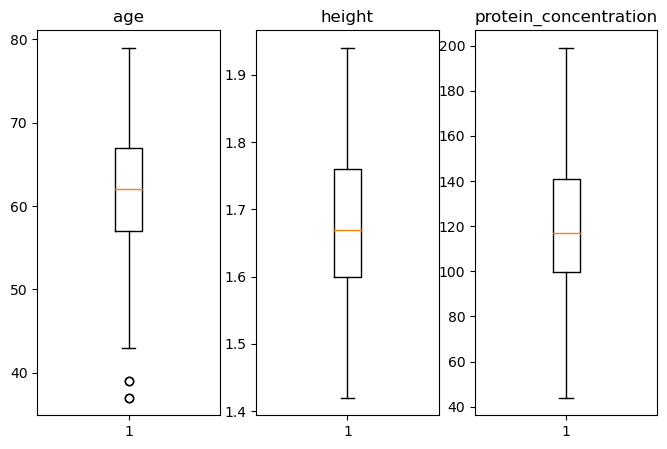

In [41]:
#Identifying the features with outliers:
plt.figure(figsize=(8,5))
for features,entry in zip(num_col,range(0,len(num_col))):
    plt.subplot(1,3,entry+1)
    plt.boxplot(X_new[features])
    plt.title(features)
plt.show()

- Outlier in age, but minimal hence no treatment needed.

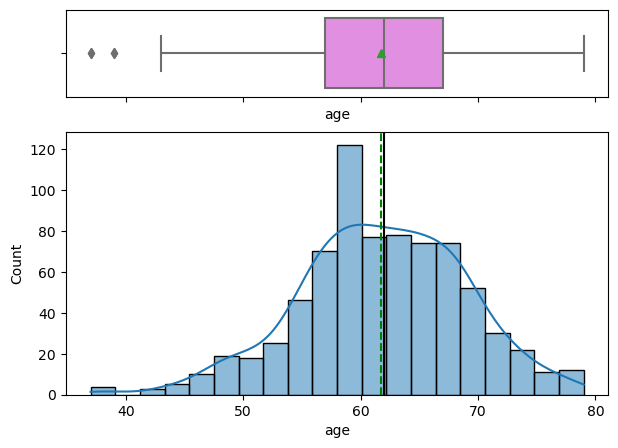

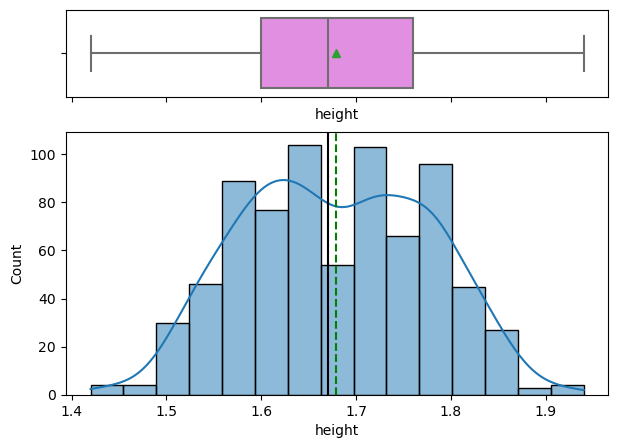

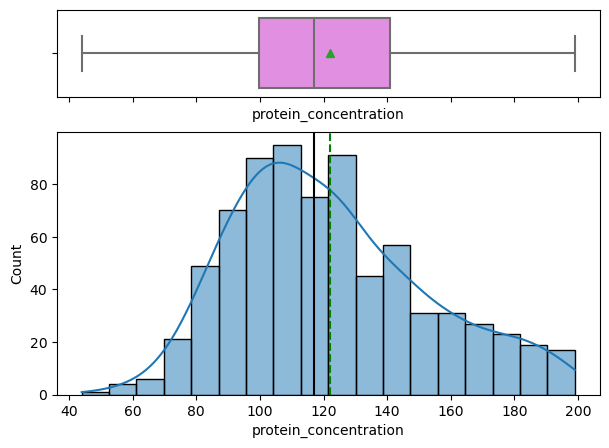

In [42]:
for col in num_col:
    histogram_boxplot(data=merged_data_new, feature=col, figsize=(7,5), kde=True, bins=None)

- The numerical features are slightly skewed to right.

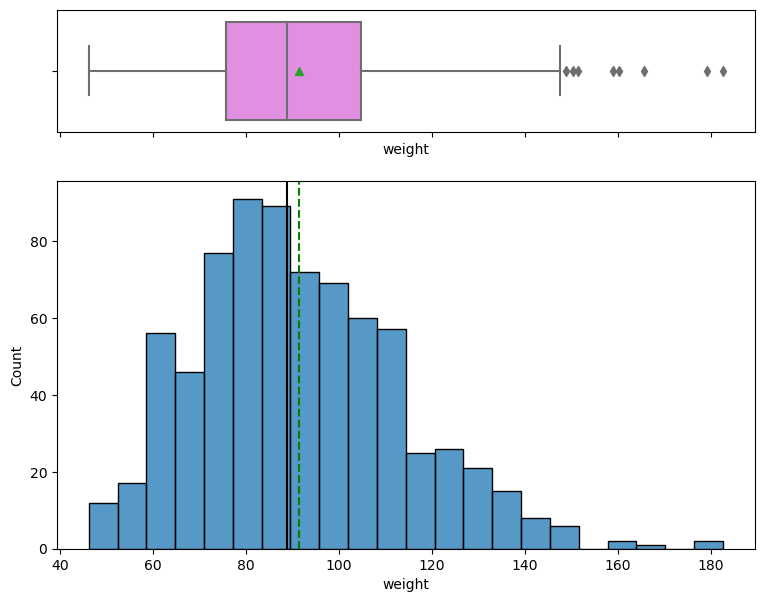

In [43]:
# Visualizing the weight feature:
histogram_boxplot(data=merged_data_new, feature='weight', figsize=(9, 7), kde=False, bins=None)

- Mean slightly far from the median.
- In model building, mean should be equal to median (normal distribution)

In [44]:
# Using log transform to transform the weight feature and adding to the dataset:
merged_data_new['weight_log'] = np.log(merged_data_new['weight'])

In [45]:
merged_data_new

,age,height,protein_concentration,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE,weight,weight_log
0,46.0,1.59,148.0,1.0,0.0,0.0,1.0,0,84.66,4.438643
1,47.0,1.64,85.0,1.0,0.0,0.0,1.0,1,71.21,4.265633
2,48.0,1.73,183.0,1.0,0.0,1.0,0.0,0,69.85,4.246350
3,59.0,1.50,89.0,1.0,0.0,0.0,1.0,1,62.94,4.142182
4,59.0,1.63,137.0,1.0,0.0,1.0,0.0,0,113.91,4.735409
...,...,...,...,...,...,...,...,...,...,...
763,61.0,1.59,101.0,1.0,0.0,1.0,0.0,1,82.95,4.418238
764,65.0,1.76,122.0,0.0,1.0,0.0,1.0,0,112.86,4.726148
765,60.0,1.77,121.0,0.0,1.0,0.0,1.0,0,81.03,4.394819
766,53.0,1.72,126.0,0.0,1.0,0.0,1.0,1,88.67,4.484922


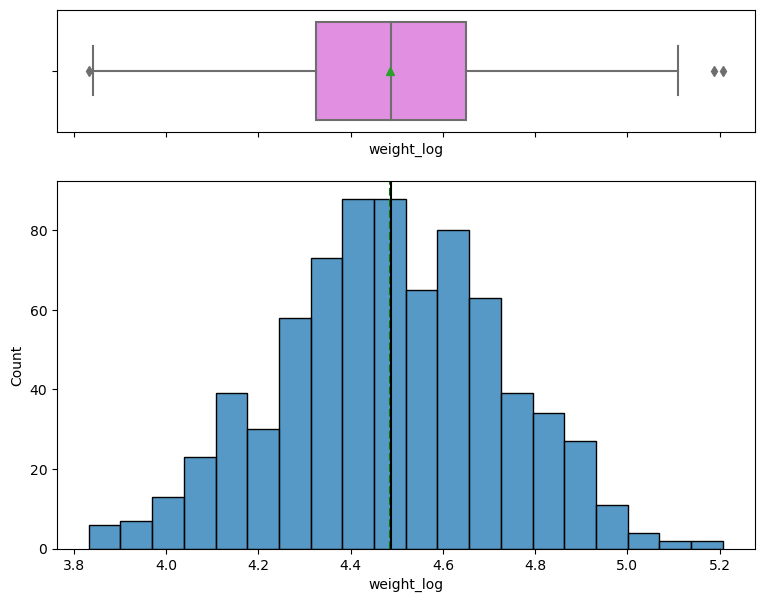

In [46]:
# Re-checking the weigh distribution:
histogram_boxplot(data=merged_data_new, feature='weight_log', figsize=(9, 7), kde=False, bins=None)

- Mean now equal to median, indicating a normal distribution.

In [47]:
# Seperating the independent and dependent variables:
X = X_new
y = merged_data_new['weight_log']

##### Splitting data into Training and Testing:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

scale = StandardScaler()
X_train_sd = scale.fit_transform(X_train)
X_test_sd = scale.transform(X_test)

In [49]:
# Linear Regressor:
prediction_train = building_model(linear_model,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(linear_model,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.16,0.04,0.20,0.30
Testing,0.16,0.04,0.20,0.34


In [50]:
# Random Forest Regressor:
rnd_forest_model = RandomForestRegressor(criterion='friedman_mse', max_depth=4)
prediction_train = building_model(rnd_forest_model,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(rnd_forest_model,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.15,0.03,0.19,0.39
Testing,0.17,0.04,0.19,0.30


In [51]:
# Support Vector Regressor:
prediction_train = building_model(svr_model,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(svr_model,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.15,0.03,0.18,0.42
Testing,0.17,0.04,0.18,0.29


In [52]:
# K nearest neighbour Regressor:
prediction_train = building_model(knn,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(knn,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.15,0.03,0.18,0.42
Testing,0.17,0.05,0.18,0.26


In [53]:
# gradient boosting:
prediction_train = building_model(grad_boost,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(grad_boost,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.13,0.03,0.16,0.56
Testing,0.17,0.04,0.16,0.27


- Linear Regressor performed best.

In [54]:
linear_model.fit(X_train_sd,y_train)

LinearRegression()

In [55]:
test_pred = linear_model.predict(X_test_sd)

In [56]:
weight = np.exp(y_test)
test = np.exp(test_pred)

In [57]:
pred_data = pd.DataFrame(np.array(weight), columns=['y_test'])
pred_data['prediction'] = test
pred_data

,y_test,prediction
0,83.99,80.651533
1,108.30,105.125948
2,75.89,119.107014
3,75.98,82.288027
4,86.48,68.119491
...,...,...
183,68.04,70.996392
184,78.44,92.408143
185,92.05,99.121502
186,68.69,89.951985


#### Making Predictions:

In [58]:
weight_null_data

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
9,SUBJ_010,73.0,Female,NaN,1.64,DRUG,Y,125.0
49,SUBJ_050,65.0,Male,NaN,1.71,DRUG,N,105.0
60,SUBJ_061,61.0,Male,NaN,1.79,CONTROL,N,84.0
81,SUBJ_082,65.0,Male,NaN,1.78,CONTROL,N,74.0
145,SUBJ_146,56.0,Female,NaN,1.57,CONTROL,N,102.0
371,SUBJ_372,67.0,Female,NaN,1.62,CONTROL,N,118.0
426,SUBJ_427,66.0,Male,NaN,1.83,CONTROL,N,94.0
494,SUBJ_495,60.0,Female,NaN,1.65,CONTROL,N,80.0
522,SUBJ_523,62.0,Female,NaN,1.60,DRUG,N,114.0
684,SUBJ_685,74.0,Male,NaN,1.81,CONTROL,N,136.0


In [59]:
X_ = weight_null_data.drop(['weight','patient_id'],axis=1)

In [60]:
X_cat_ = X_.select_dtypes(exclude='number')
X_cat_

,sex,trt_grp,RESPONSE
9,Female,DRUG,Y
49,Male,DRUG,N
60,Male,CONTROL,N
81,Male,CONTROL,N
145,Female,CONTROL,N
371,Female,CONTROL,N
426,Male,CONTROL,N
494,Female,CONTROL,N
522,Female,DRUG,N
684,Male,CONTROL,N


In [61]:
encoder2 = OneHotEncoder()
X_sex_trt2 = encoder2.fit_transform(X_[['sex','trt_grp']]).toarray()
features2 = encoder2.get_feature_names_out()
X_sex_trtDf1 = pd.DataFrame(X_sex_trt2,columns=features2,index=X_.index)
X_sex_trtDf1

,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG
9,1.0,0.0,0.0,1.0
49,0.0,1.0,0.0,1.0
60,0.0,1.0,1.0,0.0
81,0.0,1.0,1.0,0.0
145,1.0,0.0,1.0,0.0
371,1.0,0.0,1.0,0.0
426,0.0,1.0,1.0,0.0
494,1.0,0.0,1.0,0.0
522,1.0,0.0,0.0,1.0
684,0.0,1.0,1.0,0.0


In [62]:
le1 = LabelEncoder()
X_resp_encode1 = le1.fit_transform(X_['RESPONSE'])
X_resp_encodeDf1 = pd.DataFrame(X_resp_encode1,columns=['RESPONSE'],index=X_.index)
X_resp_encodeDf1

,RESPONSE
9,1
49,0
60,0
81,0
145,0
371,0
426,0
494,0
522,0
684,0


In [63]:
X_new_ = pd.concat([X_.drop(X_cat_.columns,axis=1),X_sex_trtDf1,X_resp_encodeDf1],axis=1)
X_new_

,age,height,protein_concentration,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE
9,73.0,1.64,125.0,1.0,0.0,0.0,1.0,1
49,65.0,1.71,105.0,0.0,1.0,0.0,1.0,0
60,61.0,1.79,84.0,0.0,1.0,1.0,0.0,0
81,65.0,1.78,74.0,0.0,1.0,1.0,0.0,0
145,56.0,1.57,102.0,1.0,0.0,1.0,0.0,0
371,67.0,1.62,118.0,1.0,0.0,1.0,0.0,0
426,66.0,1.83,94.0,0.0,1.0,1.0,0.0,0
494,60.0,1.65,80.0,1.0,0.0,1.0,0.0,0
522,62.0,1.60,114.0,1.0,0.0,0.0,1.0,0
684,74.0,1.81,136.0,0.0,1.0,1.0,0.0,0


In [64]:
scale = StandardScaler()
X_sd = scale.fit_transform(X_new_)

In [65]:
weight_predict = linear_model.predict(X_sd)

In [66]:
weight_predict

array([4.61897661, 4.40469422, 4.48324349, 4.42292712, 4.29020796,
       4.44262295, 4.5918655 , 4.31603601, 4.34296448, 4.75236928,
       4.67552611])

In [67]:
weight_new = np.exp(weight_predict)
weight_new

array([101.39021722,  81.83411601,  88.52132527,  83.33987427,
        72.98164384,  84.99759388,  98.67834344,  74.89117132,
        76.93527494, 115.85846022, 107.28899816])

In [68]:
merged_data.loc[merged_data['weight'].isna(), 'weight'] = weight_new

In [69]:
merged_data.loc[weight_null_data.index, 'weight'] = weight_new.round(2)
merged_data.loc[weight_null_data.index]

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
9,SUBJ_010,73.0,Female,101.39,1.64,DRUG,Y,125.0
49,SUBJ_050,65.0,Male,81.83,1.71,DRUG,N,105.0
60,SUBJ_061,61.0,Male,88.52,1.79,CONTROL,N,84.0
81,SUBJ_082,65.0,Male,83.34,1.78,CONTROL,N,74.0
145,SUBJ_146,56.0,Female,72.98,1.57,CONTROL,N,102.0
371,SUBJ_372,67.0,Female,85.00,1.62,CONTROL,N,118.0
426,SUBJ_427,66.0,Male,98.68,1.83,CONTROL,N,94.0
494,SUBJ_495,60.0,Female,74.89,1.65,CONTROL,N,80.0
522,SUBJ_523,62.0,Female,76.94,1.60,DRUG,N,114.0
684,SUBJ_685,74.0,Male,115.86,1.81,CONTROL,N,136.0


- Null values in the 'weight' feature filled.

In [70]:
merged_data.isna().sum()

patient_id               0
age                      0
sex                      0
weight                   0
height                   0
trt_grp                  0
RESPONSE                 0
protein_concentration    8
dtype: int64

- Proten_concentration has 8 null values.

#### Treating Null values in protein_concentration:

In [71]:
# Seperating the null values:
protein_clean = merged_data.dropna()
protein_null = merged_data.loc[merged_data['protein_concentration'].isna()]

In [72]:
protein_clean

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0
...,...,...,...,...,...,...,...,...
763,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,101.0
764,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,122.0
765,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,121.0
766,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,126.0


In [73]:
protein_null

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
75,SUBJ_076,78.000,Male,78.920,1.79000,DRUG,N,NaN
182,SUBJ_183,56.000,Male,91.920,1.83000,DRUG,N,NaN
342,SUBJ_343,70.000,Male,92.010,1.70000,DRUG,N,NaN
349,SUBJ_350,51.000,Male,118.810,1.71000,DRUG,Y,NaN
502,SUBJ_503,66.000,Female,91.890,1.53000,CONTROL,Y,NaN
768,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N,NaN
769,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N,NaN
770,SUBJ_771,7.854,Male,23.176,1.26343,CONTROL,N,NaN


In [74]:
# Seperating the data into independent and dependent variables:
indep_var = protein_clean.drop(['protein_concentration','patient_id'],axis=1)
depend_var = protein_clean['protein_concentration']
indep_var_cat = indep_var.select_dtypes(exclude='number')

In [75]:
indep_var_cat

,sex,trt_grp,RESPONSE
0,Female,DRUG,N
1,Female,DRUG,Y
2,Female,CONTROL,N
3,Female,DRUG,Y
4,Female,CONTROL,N
...,...,...,...
763,Female,CONTROL,Y
764,Male,DRUG,N
765,Male,DRUG,N
766,Male,DRUG,Y


In [76]:
# Encoding Categorical variables:
encoder2 = OneHotEncoder()
X_sex_trt3 = encoder2.fit_transform(indep_var_cat[['sex','trt_grp']]).toarray()
features2 = encoder2.get_feature_names_out()
X_sex_trtDf1 = pd.DataFrame(X_sex_trt3,columns=features2,index=indep_var_cat.index)

le1 = LabelEncoder()
X_resp_encode1 = le1.fit_transform(indep_var_cat['RESPONSE'])
X_resp_encodeDf1 = pd.DataFrame(X_resp_encode1,columns=['RESPONSE'],index=indep_var_cat.index)

In [77]:
X_sex_trtDf1

,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
763,1.0,0.0,1.0,0.0
764,0.0,1.0,0.0,1.0
765,0.0,1.0,0.0,1.0
766,0.0,1.0,0.0,1.0


In [78]:
X_resp_encodeDf1

,RESPONSE
0,0
1,1
2,0
3,1
4,0
...,...
763,1
764,0
765,0
766,1


In [79]:
# New dataset containing encoded variable:
indep_var_new = pd.concat([indep_var.drop(indep_var_cat.columns,axis=1),X_sex_trtDf1,X_resp_encodeDf1],axis=1)
indep_var_new

,age,weight,height,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE
0,46.0,84.66,1.59,1.0,0.0,0.0,1.0,0
1,47.0,71.21,1.64,1.0,0.0,0.0,1.0,1
2,48.0,69.85,1.73,1.0,0.0,1.0,0.0,0
3,59.0,62.94,1.50,1.0,0.0,0.0,1.0,1
4,59.0,113.91,1.63,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...
763,61.0,82.95,1.59,1.0,0.0,1.0,0.0,1
764,65.0,112.86,1.76,0.0,1.0,0.0,1.0,0
765,60.0,81.03,1.77,0.0,1.0,0.0,1.0,0
766,53.0,88.67,1.72,0.0,1.0,0.0,1.0,1


In [80]:
num_data1 = indep_var_new[['age', 'weight', 'height']]
num_col2 = num_data1.columns

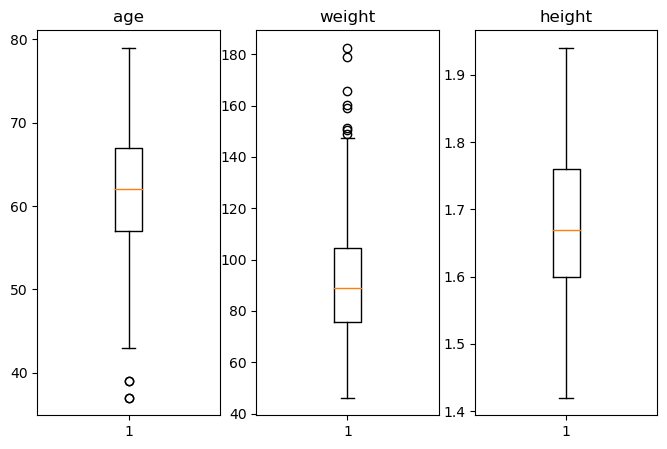

In [81]:
#Identifying the features with outliers:
plt.figure(figsize=(8,5))
for features,entry in zip(num_col2,range(0,len(num_col2))):
    plt.subplot(1,3,entry+1)
    plt.boxplot(indep_var_new[features])
    plt.title(features)
plt.show()

In [82]:
# Merging both dependent and dependent variable:
merged_data_new1 = pd.concat([indep_var_new,depend_var],axis=1)
merged_data_new1

,age,weight,height,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE,protein_concentration
0,46.0,84.66,1.59,1.0,0.0,0.0,1.0,0,148.0
1,47.0,71.21,1.64,1.0,0.0,0.0,1.0,1,85.0
2,48.0,69.85,1.73,1.0,0.0,1.0,0.0,0,183.0
3,59.0,62.94,1.50,1.0,0.0,0.0,1.0,1,89.0
4,59.0,113.91,1.63,1.0,0.0,1.0,0.0,0,137.0
...,...,...,...,...,...,...,...,...,...
763,61.0,82.95,1.59,1.0,0.0,1.0,0.0,1,101.0
764,65.0,112.86,1.76,0.0,1.0,0.0,1.0,0,122.0
765,60.0,81.03,1.77,0.0,1.0,0.0,1.0,0,121.0
766,53.0,88.67,1.72,0.0,1.0,0.0,1.0,1,126.0


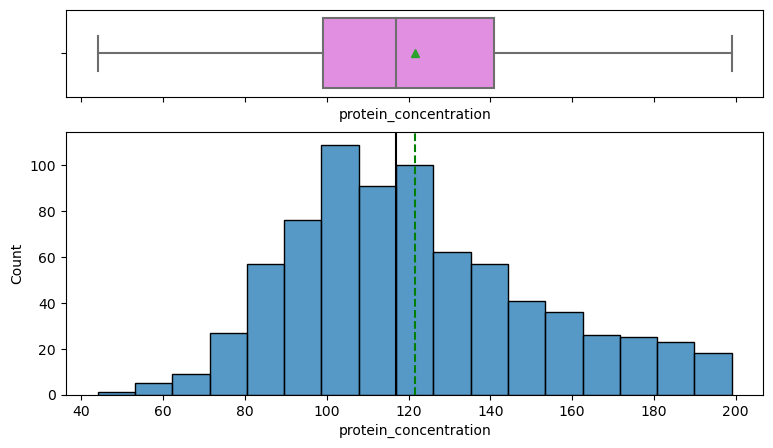

In [83]:
# Checking the disribution of the protein_concentration:
histogram_boxplot(data=merged_data_new1, feature='protein_concentration', figsize=(9,5), kde=False, bins=None)

- Slightly skewed to the right (non-normal distribution)

In [84]:
# Log transformation of the protein_concentration feature:
merged_data_new1['protein_conc_log'] = np.log(depend_var)
merged_data_new1

,age,weight,height,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE,protein_concentration,protein_conc_log
0,46.0,84.66,1.59,1.0,0.0,0.0,1.0,0,148.0,4.997212
1,47.0,71.21,1.64,1.0,0.0,0.0,1.0,1,85.0,4.442651
2,48.0,69.85,1.73,1.0,0.0,1.0,0.0,0,183.0,5.209486
3,59.0,62.94,1.50,1.0,0.0,0.0,1.0,1,89.0,4.488636
4,59.0,113.91,1.63,1.0,0.0,1.0,0.0,0,137.0,4.919981
...,...,...,...,...,...,...,...,...,...,...
763,61.0,82.95,1.59,1.0,0.0,1.0,0.0,1,101.0,4.615121
764,65.0,112.86,1.76,0.0,1.0,0.0,1.0,0,122.0,4.804021
765,60.0,81.03,1.77,0.0,1.0,0.0,1.0,0,121.0,4.795791
766,53.0,88.67,1.72,0.0,1.0,0.0,1.0,1,126.0,4.836282


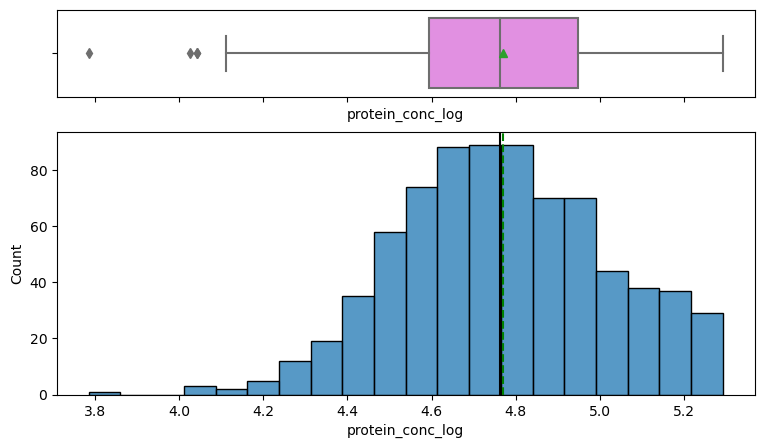

In [85]:
# Rechecking effect of Log transformation:
histogram_boxplot(data=merged_data_new1, feature='protein_conc_log', figsize=(9,5), kde=False, bins=None)

- Mean and Median now close and not far apart.

#### Building model to predict the null values in protein_concentration:

In [86]:
X = indep_var_new
y = merged_data_new1['protein_conc_log']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

scale = StandardScaler()
X_train_sd = scale.fit_transform(X_train)
X_test_sd = scale.transform(X_test)

In [87]:
prediction_train = building_model(linear_model,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(linear_model,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.16,0.04,0.20,0.35
Testing,0.16,0.04,0.20,0.35


In [88]:
prediction_train = building_model(rnd_forest_model,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(rnd_forest_model,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.15,0.03,0.18,0.45
Testing,0.17,0.05,0.18,0.32


In [89]:
# gradient boosting:
prediction_train = building_model(grad_boost,X_train_sd,X_train_sd,y_train)
prediction_test = building_model(grad_boost,X_train_sd,X_test_sd,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytest_data=y_test,Ytrain_data=y_train)

,MAE,MSE,RMSE,R2_Score
Training,0.12,0.02,0.16,0.60
Testing,0.17,0.05,0.16,0.31


- Linear Regression performed slightly better than the rest.

#### Making the prediction:

In [90]:
protein_null

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
75,SUBJ_076,78.000,Male,78.920,1.79000,DRUG,N,NaN
182,SUBJ_183,56.000,Male,91.920,1.83000,DRUG,N,NaN
342,SUBJ_343,70.000,Male,92.010,1.70000,DRUG,N,NaN
349,SUBJ_350,51.000,Male,118.810,1.71000,DRUG,Y,NaN
502,SUBJ_503,66.000,Female,91.890,1.53000,CONTROL,Y,NaN
768,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N,NaN
769,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N,NaN
770,SUBJ_771,7.854,Male,23.176,1.26343,CONTROL,N,NaN


In [91]:
X_protein = protein_null.drop(['protein_concentration','patient_id'],axis=1)
y_protein = protein_null['protein_concentration']

In [92]:
cat_X = X_protein.select_dtypes(exclude='number')
cat_X

,sex,trt_grp,RESPONSE
75,Male,DRUG,N
182,Male,DRUG,N
342,Male,DRUG,N
349,Male,DRUG,Y
502,Female,CONTROL,Y
768,Female,DRUG,N
769,Female,CONTROL,N
770,Male,CONTROL,N


In [93]:
encoder3 = OneHotEncoder()
X_sex_trt4 = encoder3.fit_transform(cat_X[['sex','trt_grp']]).toarray()
features3 = encoder3.get_feature_names_out()
X_sex_trtDf2 = pd.DataFrame(X_sex_trt4,columns=features3,index=X_protein.index)

le2 = LabelEncoder()
X_resp_encode2 = le2.fit_transform(cat_X['RESPONSE'])
X_resp_encodeDf2 = pd.DataFrame(X_resp_encode2,columns=['RESPONSE'],index=X_protein.index)

In [94]:
X_sex_trtDf2

,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG
75,0.0,1.0,0.0,1.0
182,0.0,1.0,0.0,1.0
342,0.0,1.0,0.0,1.0
349,0.0,1.0,0.0,1.0
502,1.0,0.0,1.0,0.0
768,1.0,0.0,0.0,1.0
769,1.0,0.0,1.0,0.0
770,0.0,1.0,1.0,0.0


In [95]:
X_resp_encodeDf2

,RESPONSE
75,0
182,0
342,0
349,1
502,1
768,0
769,0
770,0


In [96]:
X_protein_new = pd.concat([X_protein.drop(cat_X.columns,axis=1),X_sex_trtDf2,X_resp_encodeDf2],axis=1)
X_protein_new

,age,weight,height,sex_Female,sex_Male,trt_grp_CONTROL,trt_grp_DRUG,RESPONSE
75,78.000,78.920,1.79000,0.0,1.0,0.0,1.0,0
182,56.000,91.920,1.83000,0.0,1.0,0.0,1.0,0
342,70.000,92.010,1.70000,0.0,1.0,0.0,1.0,0
349,51.000,118.810,1.71000,0.0,1.0,0.0,1.0,1
502,66.000,91.890,1.53000,1.0,0.0,1.0,0.0,1
768,7.200,22.310,1.19300,1.0,0.0,0.0,1.0,0
769,8.310,24.220,1.27440,1.0,0.0,1.0,0.0,0
770,7.854,23.176,1.26343,0.0,1.0,1.0,0.0,0


In [97]:
scale = StandardScaler()
X_sd1 = scale.fit_transform(X_protein_new)

In [98]:
# Predicting the Protein Concentration:
protein_predict = linear_model.predict(X_sd1)
protein_predict

array([4.85783495, 4.87988527, 4.90240701, 4.64912313, 4.54699689,
       4.84832159, 4.75828833, 4.75310453])

In [99]:
# Re-converting the values using exponential function:
protein_predict_new = np.exp(protein_predict)
protein_predict_new

array([128.74516004, 131.61556223, 134.61340594, 104.49331786,
        94.34864322, 127.52616943, 116.54626611, 115.94367697])

In [100]:
# Replacing null values with the predicted values:
merged_data.loc[merged_data['protein_concentration'].isna(), 'protein_concentration'] = protein_predict_new.round()

In [101]:
merged_data.loc[protein_null.index]

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
75,SUBJ_076,78.000,Male,78.920,1.79000,DRUG,N,129.0
182,SUBJ_183,56.000,Male,91.920,1.83000,DRUG,N,132.0
342,SUBJ_343,70.000,Male,92.010,1.70000,DRUG,N,135.0
349,SUBJ_350,51.000,Male,118.810,1.71000,DRUG,Y,104.0
502,SUBJ_503,66.000,Female,91.890,1.53000,CONTROL,Y,94.0
768,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N,128.0
769,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N,117.0
770,SUBJ_771,7.854,Male,23.176,1.26343,CONTROL,N,116.0


- Null values in protein concentration filled.

In [102]:
#New and cleaned dataset:
merged_data

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N,148.0
1,SUBJ_002,47.000,Female,71.210,1.64000,DRUG,Y,85.0
2,SUBJ_003,48.000,Female,69.850,1.73000,CONTROL,N,183.0
3,SUBJ_004,59.000,Female,62.940,1.50000,DRUG,Y,89.0
4,SUBJ_005,59.000,Female,113.910,1.63000,CONTROL,N,137.0
...,...,...,...,...,...,...,...,...
766,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y,126.0
767,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y,93.0
768,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N,128.0
769,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N,117.0


In [103]:
merged_data.isna().sum()

patient_id               0
age                      0
sex                      0
weight                   0
height                   0
trt_grp                  0
RESPONSE                 0
protein_concentration    0
dtype: int64

- Null values treated in entire data.

#### Treating Pediatric Ages (less than 18 years):

In [104]:
merged_data.loc[merged_data['age']<18]

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
768,SUBJ_769,7.200,Female,22.310,1.19300,DRUG,N,128.0
769,SUBJ_770,8.310,Female,24.220,1.27440,CONTROL,N,117.0
770,SUBJ_771,7.854,Male,23.176,1.26343,CONTROL,N,116.0


In [105]:
# Dropping the entries with Ages less than 18 years:
merged_data.drop(merged_data.loc[merged_data['age']<18].index,inplace=True)

In [106]:
merged_data

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0
...,...,...,...,...,...,...,...,...
763,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,101.0
764,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,122.0
765,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,121.0
766,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,126.0


#### Computing BMI:

In [107]:
bmi = []
for weight, height in zip(merged_data['weight'],merged_data['height']):
    bm_index = weight/(height*height)
    bmi.append((round(bm_index,2)))
    
# Merging newly calculated BMI to the dataset:
merged_data['bmi'] = bmi

In [108]:
merged_data

,patient_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0,33.49
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0,26.48
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0,23.34
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0,27.97
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0,42.87
...,...,...,...,...,...,...,...,...,...
763,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,101.0,32.81
764,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,122.0,36.43
765,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,121.0,25.86
766,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,126.0,29.97


In [109]:
def label_renaming(response):
    if response == 'Y':
        return "Yes"
    else:
        return "No"

In [110]:
merged_data['RESPONSE'] = merged_data['RESPONSE'].apply(lambda x: label_renaming(x))

In [111]:
merged_data.rename(columns={'trt_grp':'treatment', 'protein_concentration':'protein_conc'}, inplace=True)
merged_data.head()

,patient_id,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,No,148.0,33.49
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Yes,85.0,26.48
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,No,183.0,23.34
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Yes,89.0,27.97
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,No,137.0,42.87


### 5. Aggregate the Data:

#### Subsetting the Dataset to Obtain specific data based on some properties:

In [112]:
# All DRUG treatment:
DRUG_df = merged_data.loc[merged_data['treatment']=='DRUG']

# All CONTROL treatment:
CONTROL_df = merged_data.loc[merged_data['treatment']=='CONTROL']

# No Response(N) & Response (Y) to treatments(DRUG and CONTROL):
merged_data_N = merged_data.loc[merged_data['RESPONSE']=='No']
merged_data_Y = merged_data.loc[merged_data['RESPONSE']=='Yes']

# Response(Y) and No Response(N) to DRUG treatment:
DRUG_response_Y = merged_data.loc[(merged_data['treatment']=='DRUG') & (merged_data['RESPONSE']=='Yes')]
DRUG_response_N = merged_data.loc[(merged_data['treatment']=='DRUG') & (merged_data['RESPONSE']=='No')]

# Response(Y) and No Response(N) to CONTROL treatment:
CONTROL_response_Y = merged_data.loc[(merged_data['treatment']=='CONTROL') & (merged_data['RESPONSE']=='Yes')]
CONTROL_response_N = merged_data.loc[(merged_data['treatment']=='CONTROL') & (merged_data['RESPONSE']=='No')]

In [113]:
mean_age_drug = round((sum(DRUG_df['age'])/len(DRUG_df)),2)
mean_age_drug

61.76

In [114]:
mean_age_control = round((sum(CONTROL_df['age'])/len(CONTROL_df)),2)
mean_age_control

61.86

In [115]:
mean_age_N = round((sum(merged_data_N['age'])/len(merged_data_N)),2)
mean_age_N

61.75

In [116]:
mean_age_Y = round((sum(merged_data_Y['age'])/len(merged_data_Y)),2)
mean_age_Y

61.89

In [117]:
mean_weight_Y = round((sum(merged_data_Y['weight'])/len(merged_data_Y)),2)
mean_weight_Y

93.33

In [118]:
DRUG_response_Y.head()

,patient_id,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Yes,85.0,26.48
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Yes,89.0,27.97
9,SUBJ_010,73.0,Female,101.39,1.64,DRUG,Yes,125.0,37.70
15,SUBJ_016,54.0,Male,86.75,1.71,DRUG,Yes,100.0,29.67
18,SUBJ_019,51.0,Male,131.63,1.75,DRUG,Yes,103.0,42.98


In [119]:
DRUG_response_N.head()

,patient_id,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,No,148.0,33.49
7,SUBJ_008,57.0,Male,93.50,1.63,DRUG,No,115.0,35.19
8,SUBJ_009,72.0,Male,85.57,1.68,DRUG,No,197.0,30.32
11,SUBJ_012,53.0,Male,125.02,1.82,DRUG,No,168.0,37.74
12,SUBJ_013,58.0,Female,76.31,1.68,DRUG,No,139.0,27.04


In [120]:
CONTROL_response_Y.head()

,patient_id,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
5,SUBJ_006,63.0,Male,79.33,1.77,CONTROL,Yes,116.0,25.32
10,SUBJ_011,67.0,Male,109.12,1.71,CONTROL,Yes,110.0,37.32
17,SUBJ_018,65.0,Female,80.04,1.64,CONTROL,Yes,107.0,29.76
23,SUBJ_024,56.0,Female,68.36,1.54,CONTROL,Yes,119.0,28.82
47,SUBJ_048,60.0,Male,91.61,1.82,CONTROL,Yes,71.0,27.66


In [121]:
CONTROL_response_N.head()

,patient_id,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,No,183.0,23.34
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,No,137.0,42.87
6,SUBJ_007,77.0,Male,96.12,1.77,CONTROL,No,78.0,30.68
16,SUBJ_017,57.0,Male,144.15,1.78,CONTROL,No,118.0,45.50
20,SUBJ_021,61.0,Male,122.87,1.78,CONTROL,No,126.0,38.78


In [122]:
merged_data.describe()

,age,weight,height,protein_conc,bmi
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,61.811198,91.363437,1.679271,121.667969,32.304310
std,7.107447,22.037640,0.097888,30.466266,6.881315
min,37.000000,46.170000,1.420000,44.000000,17.980000
25%,57.000000,75.835000,1.600000,99.000000,27.365000
50%,62.000000,88.875000,1.680000,117.000000,32.060000
75%,67.000000,104.652500,1.760000,140.250000,36.350000
max,79.000000,182.500000,1.940000,199.000000,67.520000


### Data Visualizations and Analysis:

##### Function to make Plots:

In [123]:
# Adding percentage weight to plots:
def plot_percent_weight(plot_name,data,feature,show_value=None):
    '''
    plot_name: The name of the variable assigned to the plot.
    data: The dataframe to compute the weight against.
    feature: The feature being plotted against.
    show_value: Determines the weight to show whether only percent or percent and weight (True or False).
    '''
    #Calculating the weights:
    for attribute in plot_name.patches:
        if show_value==True:
            value = '{}'.format(attribute.get_height())
        elif show_value==False:
            value = '{:.1f}%'.format(100 * attribute.get_height() / len(data[feature]))
            
        #Defining annotation coordinatites:
        x_cord = attribute.get_x() + attribute.get_width() / 6
        y_cord = attribute.get_height()
        plot_name.annotate(value,(x_cord,y_cord),textcoords='offset points',xytext=(15,2), ha='center')
    return

# Function for making countplots:
def countplot_func(data,main_data,plot_size,xlabel,plot_title,plot_variable=None,add_count=False,xticks=None):
    '''
    data: The data containing the feature being plotted.
    main_data: The dataframe to compute the feature weight against.
    plot_size: size of the plot.
    xlabel: Name of x-axis.
    plot_title: Title of plot.
    plot_variable: Feature from main_data to be weighted against.
    add_count: Determines whether to add percent or both percent and weight (True or False).
    '''
    plt.figure(figsize=plot_size)
    plot_name = sns.countplot(data=data, x=xlabel)  #Instance of the plot created
    plot_percent_weight(plot_name,main_data,plot_variable,add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.xticks(rotation=xticks)
    plt.show()
    return

def countplot_func2(data,main_data,plot_size,xlabel,plot_title,plot_variable=None,add_count=False,xticks=None):
    '''
    data: The data containing the feature being plotted.
    main_data: The dataframe to compute the feature weight against.
    plot_size: size of the plot.
    xlabel: Name of x-axis.
    plot_title: Title of plot.
    plot_variable: Feature from main_data to be weighted against.
    add_count: Determines whether to add percent or both percent and weight (True or False).
    '''
    plt.figure(figsize=plot_size)
    plot_name = sns.countplot(data=data, x=xlabel,palette='PuBuGn_r')  #Instance of the plot created
    plot_percent_weight(plot_name,main_data,plot_variable,add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.xticks(rotation=xticks)
    plt.show()
    return

# Function for making barplots:
def barplot_func(data,main_data,plot_size,x,y,xlabel,plot_title,plot_variable,add_count,xticks=None):
    plt.figure(figsize=plot_size)
    plot_name = sns.barplot(data=data, x=x, y=y)
    plot_percent_weight(plot_name,main_data,plot_variable,show_value=add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.xticks(rotation=xticks)
    plt.show()
    return

def barplot_func2(data,main_data,plot_size,x,y,xlabel,plot_title,plot_variable,add_count,xticks=None):
    plt.figure(figsize=plot_size)
    plot_name = sns.barplot(data=data, x=x, y=y, palette='PuBuGn_r')
    plot_percent_weight(plot_name,main_data,plot_variable,show_value=add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.xticks(rotation=xticks)
    plt.show()
    return

def catplot_func(data,x,y,kind,height,aspect,plot_title,xlabel):
    '''
    data: Dataframe being considered.
    x: feature on x-axis.
    y: feature on y_axis.
    kind: Specifies the type of plot (e.g box).
    height,aspect: Specifies the size of plot.
    plot_title: Title of plot'.
    xlabel: Title on x-axis.
    '''
    sns.catplot(data=data, x=x, y=y, kind=kind,height=height, aspect=aspect)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.show()
    return

In [124]:
merged_data.head()

,patient_id,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,No,148.0,33.49
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Yes,85.0,26.48
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,No,183.0,23.34
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Yes,89.0,27.97
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,No,137.0,42.87


### Response, Age & Protein Concentration:

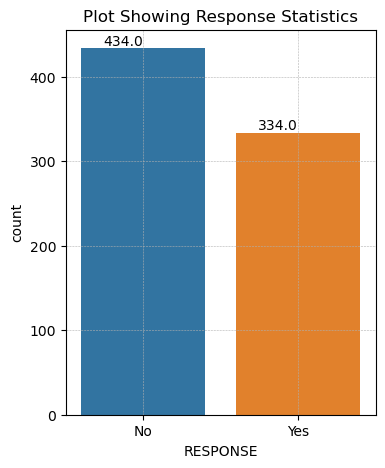

In [125]:
# Response Distribution:
plot = countplot_func(data=merged_data,main_data=merged_data,plot_size=(4,5),xlabel='RESPONSE',
                      plot_title='Plot Showing Response Statistics',plot_variable='RESPONSE',add_count=True)

- Overall, the total number of patients whoresponded positively fell short by 13%(100).

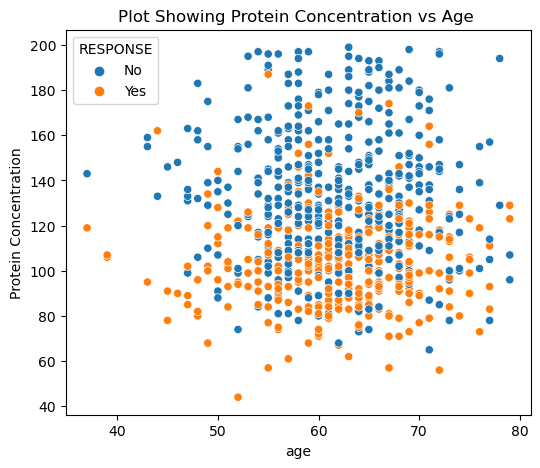

In [203]:
# Age Vs Protein Concentration:
plt.figure(figsize=(6,5))
sns.scatterplot(data=merged_data,x='age',y='protein_conc',hue='RESPONSE')
plt.title('Plot Showing Protein Concentration vs Age ')
plt.ylabel('Protein Concentration')
plt.show()

In [128]:
merged_data.groupby('RESPONSE')['protein_conc'].describe()

,count,mean,std,min,25%,50%,75%,max
RESPONSE,,,,,,,,
No,434.0,134.956221,29.947304,65.0,112.0,133.0,155.0,199.0
Yes,334.0,104.401198,21.037521,44.0,91.0,102.5,116.0,187.0


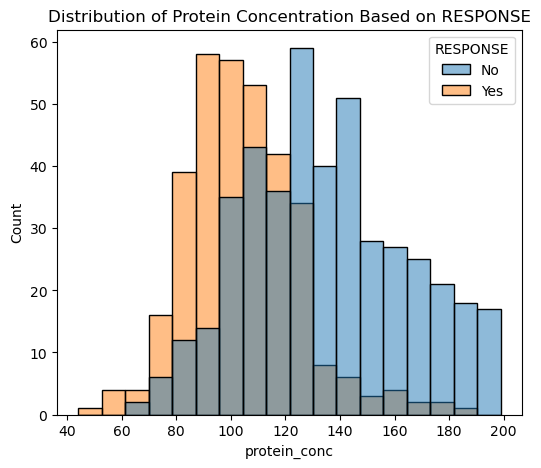

In [129]:
# Age Vs Protein Concentration:
plt.figure(figsize=(6,5))
sns.histplot(data=merged_data,x='protein_conc',hue='RESPONSE')
plt.title('Distribution of Protein Concentration Based on RESPONSE')
plt.show()

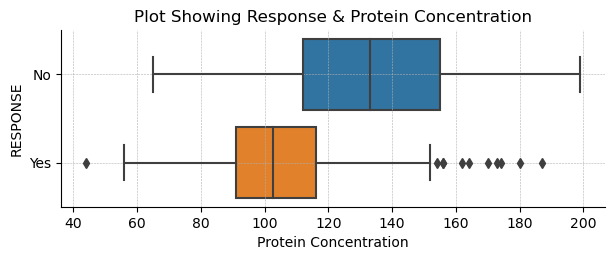

In [130]:
catplot_func(data=merged_data,x='protein_conc',y='RESPONSE',kind='box',height=2.5,aspect=2.5,
             plot_title='Plot Showing Response & Protein Concentration',xlabel='Protein Concentration')

- Overall, most of the patients who responded positively had protein concentration below 116.

In [154]:
protein_conc_high = merged_data[merged_data['protein_conc']>116]
protein_conc_low = merged_data[merged_data['protein_conc']<=116]

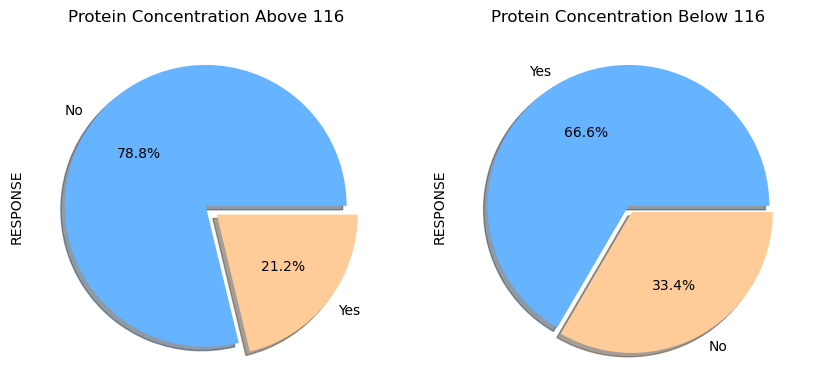

In [159]:
fig, position = plt.subplots(1,2, figsize=(10,5), dpi=100)
color = ['#66b3ff', '#ffcc99']
plot = protein_conc_high['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[0], colors=color, 
                                                             explode = [0,0.1],shadow=True)
plot = protein_conc_low['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[1], colors=color,
                                                            explode = [0,0.05],shadow=True)
position[0].set_title('Protein Concentration Above 116')
position[1].set_title('Protein Concentration Below 116')
plt.show()

- Over 78.8% of patients with protein concentration above 116 didn't respond positive to both treatment combined while only 66.6% responded and had protein concentrations below 116.

### Treatment group - DRUG:

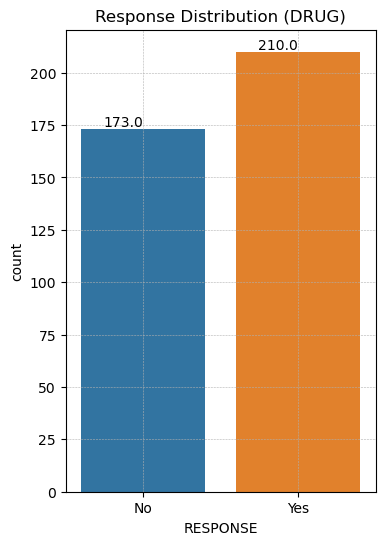

In [133]:
countplot_func(data=DRUG_df,main_data=DRUG_df,plot_size=(4,6),xlabel='RESPONSE',plot_title='Response Distribution (DRUG)',
               plot_variable='RESPONSE',add_count=True)

- 54.8% of patient who took DRUG reponded positively while 45.2% responded negatively.
- More responded positively to the DRUG.

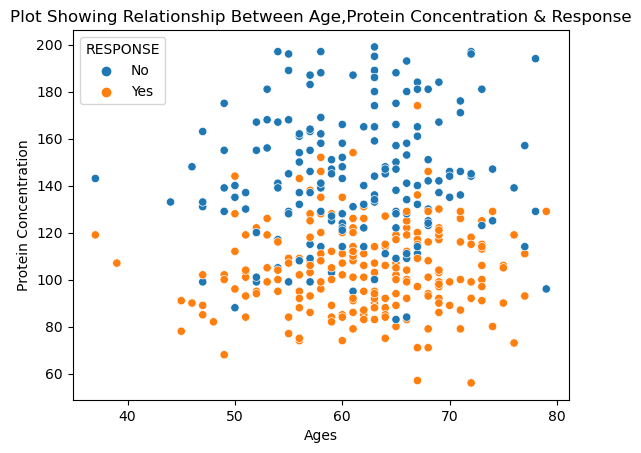

In [134]:
plt.figure(dpi=100)
sns.scatterplot(data=DRUG_df,x='age',y='protein_conc',hue='RESPONSE')
plt.title('Plot Showing Relationship Between Age,Protein Concentration & Response')
plt.xlabel('Ages')
plt.ylabel('Protein Concentration')
plt.show()

- Similarly, although more paient responded well to the drug, patients with higher protein level responded poorly while those with lower protein levels responded positively.

In [135]:
DRUG_df.groupby('RESPONSE')['protein_conc'].describe()

,count,mean,std,min,25%,50%,75%,max
RESPONSE,,,,,,,,
No,173.0,144.248555,26.839566,83.0,128.00,143.0,163.0,199.0
Yes,210.0,103.876190,18.319700,56.0,91.25,102.5,116.0,174.0


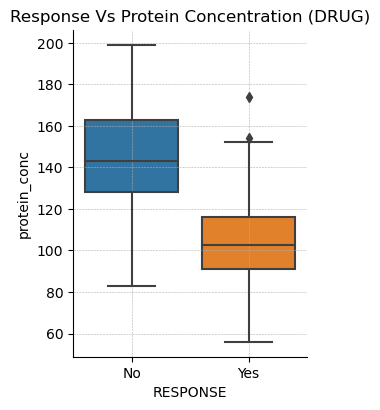

In [136]:
catplot_func(data=DRUG_df,x='RESPONSE',y='protein_conc',kind='box',height=4,aspect=0.8,
             plot_title='Response Vs Protein Concentration (DRUG)',xlabel='RESPONSE')

- Most patient with Positive response had protein levels below 116.
- Most patient with Negative response had protein levels above 116.
- The higher the protein level, the more likely it is for the patient not to respond well.

In [156]:
drug_protein_high = DRUG_df[DRUG_df['protein_conc']>116]
drug_protein_low = DRUG_df[DRUG_df['protein_conc']<=116]

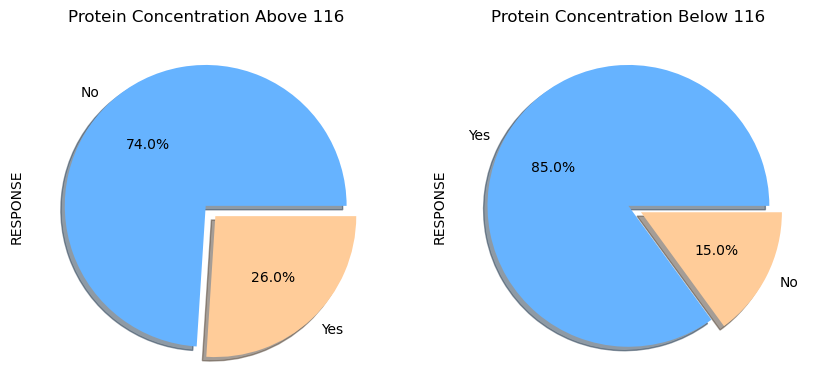

In [160]:
fig, position = plt.subplots(1,2, figsize=(10,5), dpi=100)
color = ['#66b3ff', '#ffcc99']
plot = drug_protein_high['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[0], colors=color, 
                                                             explode = [0,0.1],shadow=True)
plot = drug_protein_low['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[1], colors=color,
                                                            explode = [0,0.1],shadow=True)
position[0].set_title('Protein Concentration Above 116')
position[1].set_title('Protein Concentration Below 116')
plt.show()

- 85% of patients with protein concentrations less than 116 reponded positively to Drug treatment while only 15% showed no response (Perhaps they may have other prevailing health issues).
- 74% of patients whose protein concentration was above 116 showed no response to Drug treatment.

In [139]:
male_drug = DRUG_df[DRUG_df['sex']=='Male']
female_drug = DRUG_df[DRUG_df['sex']=='Female']

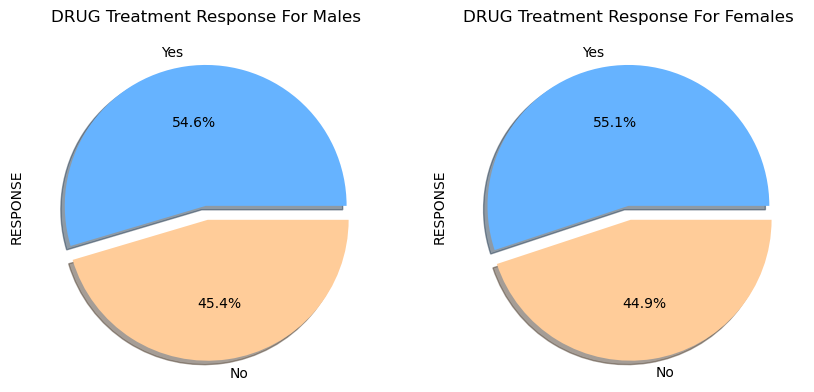

In [140]:
#data_drug = DRUG_df[DRUG_df['protein_conc']>174]
fig, position = plt.subplots(1,2, figsize=(10,5), dpi=100)
color = ['#66b3ff', '#ffcc99']
plot = male_drug['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[0], colors=color, 
                                                             explode = [0,0.1],shadow=True)
plot = female_drug['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[1], colors=color,
                                                            explode = [0,0.1],shadow=True)
position[0].set_title('DRUG Treatment Response For Males')
position[1].set_title('DRUG Treatment Response For Females')
plt.show()

- More patients responded well to Drug treatments for both genders.

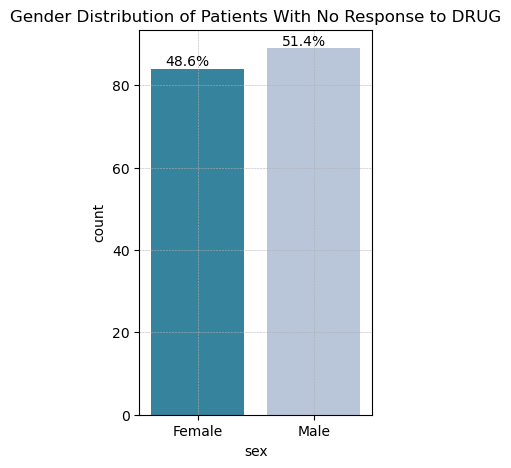

In [141]:
countplot_func2(data=DRUG_response_N,main_data=DRUG_response_N,plot_size=(3,5),xlabel='sex',
               plot_title='Gender Distribution of Patients With No Response to DRUG',plot_variable='sex',add_count=False)

In [142]:
DRUG_df['sex'].value_counts()

Male      196
Female    187
Name: sex, dtype: int64

- 51.4% of patients with no response to drug treatment were males while 48.6% were females.

#### Treatment group - CONTROL:

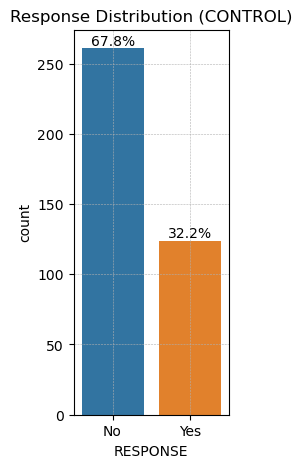

In [148]:
countplot_func(data=CONTROL_df,main_data=CONTROL_df,plot_size=(2,5),xlabel='RESPONSE',plot_title='Response Distribution (CONTROL)',
               plot_variable='RESPONSE',add_count=False)

- A larger percent (67.8%) of patient who took the CONTROL didn't respond to treatment while less than half of the patients who took the control measure responded well to treatment.

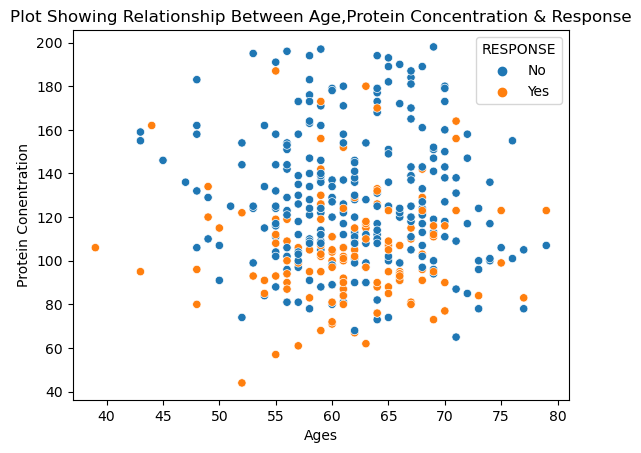

In [151]:
plt.figure(dpi=100)
sns.scatterplot(data=CONTROL_df,x='age',y='protein_conc',hue='RESPONSE')
plt.title('Plot Showing Relationship Between Age,Protein Concentration & Response')
plt.xlabel('Ages')
plt.ylabel('Protein Conentration')
plt.show()

In [152]:
CONTROL_df.groupby('RESPONSE')['protein_conc'].describe()

,count,mean,std,min,25%,50%,75%,max
RESPONSE,,,,,,,,
No,261.0,128.796935,30.356234,65.0,107.0,124.0,149.00,198.0
Yes,124.0,105.290323,25.033238,44.0,90.0,102.5,117.25,187.0


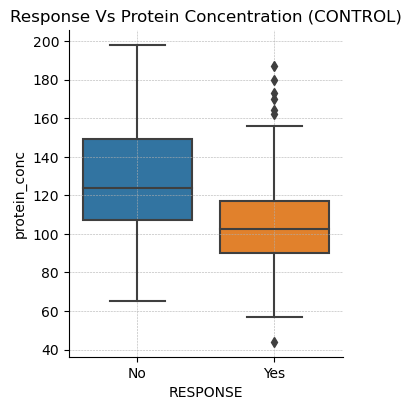

In [153]:
catplot_func(data=CONTROL_df,x='RESPONSE',y='protein_conc',kind='box',height=4,aspect=0.9,
             plot_title='Response Vs Protein Concentration (CONTROL)',xlabel='RESPONSE')

- Most patients who responded to the CONTROL treatment had protein concentrations between 90 and 117. Those who didn't respond (67.8%) had protein concentration between 107 and 149.

- Similar to the DRUG, the response becomes poorer as the protein concentration increases.

In [158]:
control_protein_high = CONTROL_df[CONTROL_df['protein_conc']>116]
control_protein_low = CONTROL_df[CONTROL_df['protein_conc']<=116]

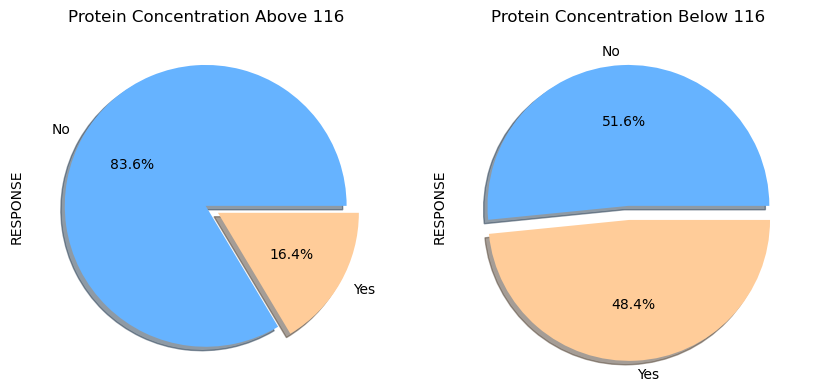

In [161]:
fig, position = plt.subplots(1,2, figsize=(10,5), dpi=100)
color = ['#66b3ff', '#ffcc99']
plot = control_protein_high['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[0], colors=color, 
                                                             explode = [0,0.1],shadow=True)
plot = control_protein_low['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[1], colors=color,
                                                            explode = [0,0.1],shadow=True)
position[0].set_title('Protein Concentration Above 116')
position[1].set_title('Protein Concentration Below 116')
plt.show()

- Over 83% of patients who took CONTROL treatment, with protein concentrations higher than 116, showed no response.
- Overall, most patients did not respond to CONTROL treatment.

In [162]:
male_control = CONTROL_df[CONTROL_df['sex']=='Male']
female_control = CONTROL_df[CONTROL_df['sex']=='Female']

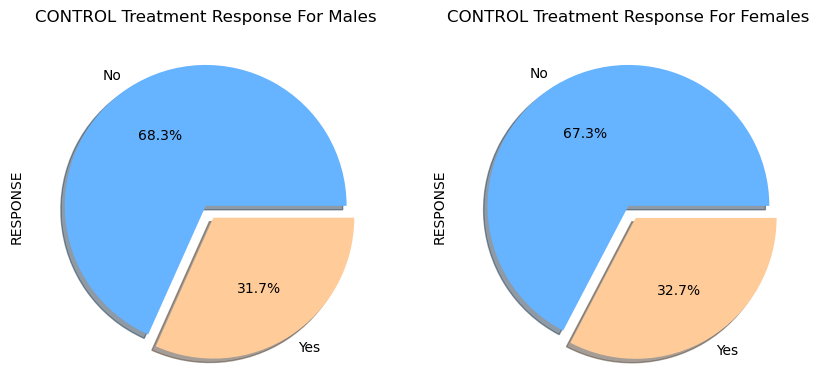

In [163]:
#data_drug = DRUG_df[DRUG_df['protein_conc']>174]
fig, position = plt.subplots(1,2, figsize=(10,5), dpi=100)
color = ['#66b3ff', '#ffcc99']
plot = male_control['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[0], colors=color, 
                                                             explode = [0,0.1],shadow=True)
plot = female_control['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[1], colors=color,
                                                            explode = [0,0.1],shadow=True)
position[0].set_title('CONTROL Treatment Response For Males')
position[1].set_title('CONTROL Treatment Response For Females')
plt.show()

- More patients (over 67%), for both genders, showed no response to CONTROL while only about 32% reponded to the treatment.

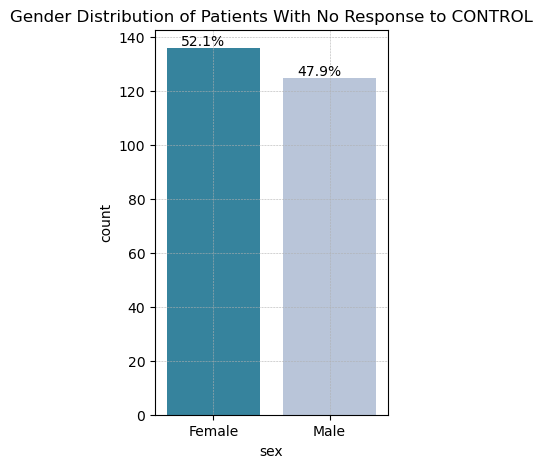

In [164]:
countplot_func2(data=CONTROL_response_N,main_data=CONTROL_response_N,plot_size=(3,5),xlabel='sex',
               plot_title='Gender Distribution of Patients With No Response to CONTROL',plot_variable='sex',add_count=False)

- More females showed no response to CONTROL compared to males.

## Overall Result From Analysis:
- Patients in treatment group 'DRUG' has an overall positive response while the 'CONTROL' group responded poorly.
- The protein concentration in the blood played a key role in determining the response of a patient in both DRUG and CONTROL treatment groups. 
- Protein Levels of most patients with no response ranges between 112 and 155 ug/L.
- Protein Levels of most patients with positive response ranges between 91 and 116 ug/L.
- Most patients who took the DRUG treatment responded positively
- DRUG: 85% of patients with protein concetration less than 116 ug/L responded positively while ony 15% showed no response.
- DRUG: About 78% of patients with protein levels higher than 116 ug/L showed no response.
- CONTROL: Most patients who showed no response had protein concentration between 107 and 149 ug/L.
- CONTROL: 83.8% of patients above 116 ug/l protein concentration showed no response, with only about 16% responding.
- In summary, the lower the amount of protein concentration in the blood, the better the chances of both treatment groups having a positive response and vice versa.

### RECOMMENDATION:
- Since the drugs performed better overall, it can be taken to the next level in trials, if need be, and more improvement carried out to increase its positive effect on patient.
- Both treatments (drug and control) should only be administered to patients with protein levels less than 107 ug/L for CONTROL treatment and less than 116 ug/L for DRUG treatment. 
- However, since there is a relationsip between the protein levels and the patient's response to treatment, to get the best result and make the treatment effective, patients should be informed or advised to reduce their protein intake, perhaps for few days leading to and after taking the drug. This would also help improve the effect and performance of the drug.

## Additional Task

### Machine Learning Algorithm to Predict Patient's RESPONSE:

In [192]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import (precision_score,
                            accuracy_score,
                            recall_score,
                            f1_score)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [166]:
# Classification and Confusion Matrix Display plot function:
def classification_confusion_matrix(fig,yTest,yTrain,yPrediction_train, yPrediction_test,target_labels):
    print('Classification Report for Training:')
    print(classification_report(yTrain, yPrediction_train))
    print('='*80)
    print('Classification Report for Testing:')
    print(classification_report(yTest, yPrediction_test))
    print('='*80)
    fig, ax = plt.subplots(1,2,figsize=fig)
    ConfusionMatrixDisplay.from_predictions(yTrain,yPrediction_train, display_labels=target_labels,ax=ax[0])
    ConfusionMatrixDisplay.from_predictions(yTest,yPrediction_test, display_labels=target_labels,ax=ax[1])
    ax[0].title.set_text('Training')
    ax[1].title.set_text('Testing')
    plt.show()
    return

In [167]:
# Performance Evaluation Function:
def performance_evaluation(prediction_test,prediction_train,Ytest_data,Ytrain_data):
    
    #Training:
    prec_train = precision_score(Ytrain_data,prediction_train)
    accu_train = accuracy_score(Ytrain_data,prediction_train)
    rec_train = recall_score(Ytrain_data,prediction_train)
    f1_train = f1_score(Ytrain_data,prediction_train)
    
    #Testing:    
    prec_test = precision_score(Ytest_data,prediction_test)
    accu_test = accuracy_score(Ytest_data,prediction_test)
    rec_test = recall_score(Ytest_data,prediction_test)
    f1_test = f1_score(Ytest_data,prediction_test)
    
    #Performance Dataframe:
    perform_eval = pd.DataFrame({'Precision':[f'{prec_train:.2f}',f'{prec_test:.2f}'],                                 'Recall':[f'{rec_train:.2f}',f'{rec_test:.2f}'],                                 'F1 Score':[f'{f1_train:.2f}',f'{f1_test:.2f}'],                               'Accuracy':[f'{accu_train:.2f}',f'{accu_test:.2f}']},                                index=['Training','Testing'])
    return perform_eval

In [168]:
merged_data

,patient_id,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,No,148.0,33.49
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Yes,85.0,26.48
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,No,183.0,23.34
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Yes,89.0,27.97
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,No,137.0,42.87
...,...,...,...,...,...,...,...,...,...
763,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Yes,101.0,32.81
764,SUBJ_765,65.0,Male,112.86,1.76,DRUG,No,122.0,36.43
765,SUBJ_766,60.0,Male,81.03,1.77,DRUG,No,121.0,25.86
766,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Yes,126.0,29.97


In [169]:
response_data = merged_data.copy()

In [170]:
# Dropping the Patient_id:
response_data.drop('patient_id', axis=1, inplace=True)

In [171]:
response_data

,age,sex,weight,height,treatment,RESPONSE,protein_conc,bmi
0,46.0,Female,84.66,1.59,DRUG,No,148.0,33.49
1,47.0,Female,71.21,1.64,DRUG,Yes,85.0,26.48
2,48.0,Female,69.85,1.73,CONTROL,No,183.0,23.34
3,59.0,Female,62.94,1.50,DRUG,Yes,89.0,27.97
4,59.0,Female,113.91,1.63,CONTROL,No,137.0,42.87
...,...,...,...,...,...,...,...,...
763,61.0,Female,82.95,1.59,CONTROL,Yes,101.0,32.81
764,65.0,Male,112.86,1.76,DRUG,No,122.0,36.43
765,60.0,Male,81.03,1.77,DRUG,No,121.0,25.86
766,53.0,Male,88.67,1.72,DRUG,Yes,126.0,29.97


In [172]:
#Categorical Variables:
cat = response_data.select_dtypes(include='object')
cat

,sex,treatment,RESPONSE
0,Female,DRUG,No
1,Female,DRUG,Yes
2,Female,CONTROL,No
3,Female,DRUG,Yes
4,Female,CONTROL,No
...,...,...,...
763,Female,CONTROL,Yes
764,Male,DRUG,No
765,Male,DRUG,No
766,Male,DRUG,Yes


In [174]:
encode_1 = pd.get_dummies(response_data[['sex','treatment']])
encode_1

,sex_Female,sex_Male,treatment_CONTROL,treatment_DRUG
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,1,0,0,1
4,1,0,1,0
...,...,...,...,...
763,1,0,1,0
764,0,1,0,1
765,0,1,0,1
766,0,1,0,1


In [175]:
Le = LabelEncoder()
encode_2 = Le.fit_transform(response_data['RESPONSE'])
encode_2_df = pd.DataFrame(encode_2,columns=['RESPONSE'],index=response_data.index)
encode_2_df

,RESPONSE
0,0
1,1
2,0
3,1
4,0
...,...
763,1
764,0
765,0
766,1


In [176]:
# Merging the encoded data and dropping previous features:
response_data_new = pd.concat([response_data.drop(cat.columns,axis=1),encode_1,encode_2_df], axis=1)
response_data_new

,age,weight,height,protein_conc,bmi,sex_Female,sex_Male,treatment_CONTROL,treatment_DRUG,RESPONSE
0,46.0,84.66,1.59,148.0,33.49,1,0,0,1,0
1,47.0,71.21,1.64,85.0,26.48,1,0,0,1,1
2,48.0,69.85,1.73,183.0,23.34,1,0,1,0,0
3,59.0,62.94,1.50,89.0,27.97,1,0,0,1,1
4,59.0,113.91,1.63,137.0,42.87,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
763,61.0,82.95,1.59,101.0,32.81,1,0,1,0,1
764,65.0,112.86,1.76,122.0,36.43,0,1,0,1,0
765,60.0,81.03,1.77,121.0,25.86,0,1,0,1,0
766,53.0,88.67,1.72,126.0,29.97,0,1,0,1,1


In [177]:
X = response_data_new.drop('RESPONSE', axis=1)
y = response_data_new['RESPONSE']

In [178]:
y.value_counts(normalize=True)

0    0.565104
1    0.434896
Name: RESPONSE, dtype: float64

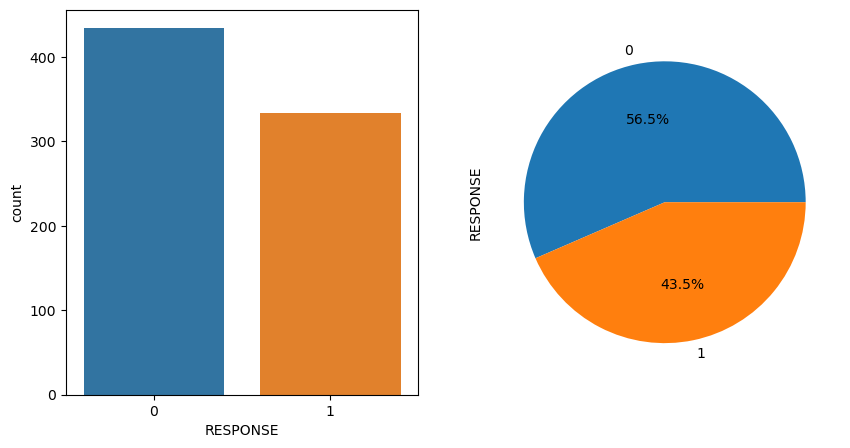

In [179]:
# Checking imbalance:
fig, position = plt.subplots(1,2, figsize=(10,5), dpi=100)
plot = sns.countplot(x = 'RESPONSE', data = response_data_new, ax=position[0])
plot = y.value_counts().plot.pie(autopct="%1.1f%%", ax=position[1]) 

- Target label (RESPONSE) is slightly imbalanced.

In [180]:
# Balancing the data:
from imblearn.over_sampling import SMOTE, SMOTENC
smote = SMOTENC(categorical_features=range(5,9), random_state=0)
X_new,y_new = smote.fit_resample(X,y)

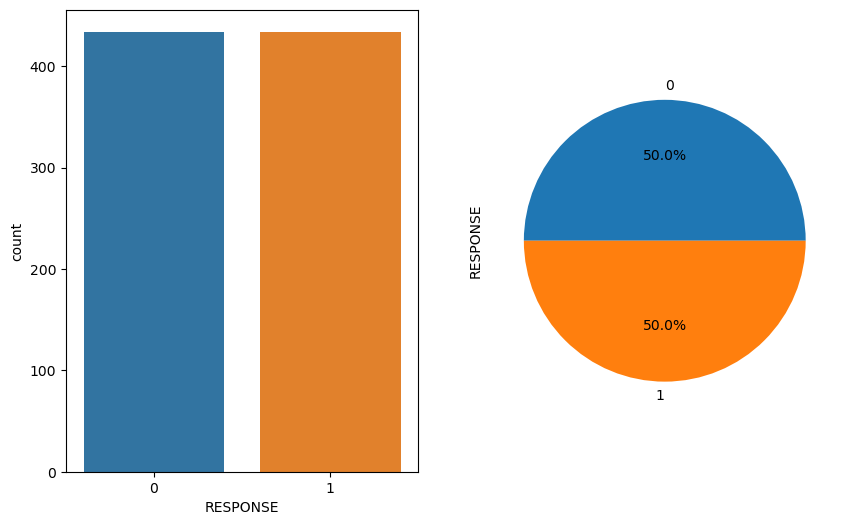

In [181]:
# Checking imbalance:
response_bal_df = pd.concat([X_new,y_new], axis = 1) # creating a dataframe for the balanced dat
fig, position = plt.subplots(1,2,figsize=(10,6))
plot = sns.countplot(x='RESPONSE',data=response_bal_df,  ax=position[0])
plot = response_bal_df['RESPONSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[1])

In [182]:
# Splitting data into training and testing:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.25,stratify=y_new, random_state=42)

In [183]:
# Normalizing the data:
scale = StandardScaler()
X_train_ = scale.fit_transform(X_train)
X_test_ = scale.transform(X_test)

In [193]:
# Creating an Instance of Classifiers:
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier(max_depth=6)
knn_class = KNeighborsClassifier()

#### Logistic Regression:

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       325
           1       0.78      0.82      0.80       326

    accuracy                           0.79       651
   macro avg       0.79      0.79      0.79       651
weighted avg       0.79      0.79      0.79       651

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       109
           1       0.75      0.80      0.77       108

    accuracy                           0.76       217
   macro avg       0.77      0.77      0.76       217
weighted avg       0.77      0.76      0.76       217



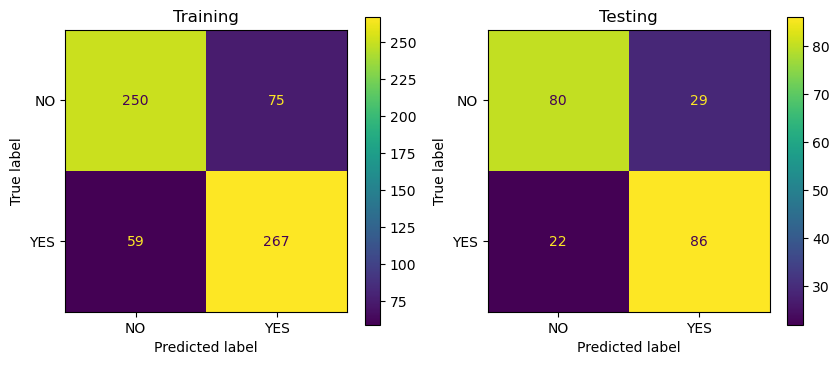

,Precision,Recall,F1 Score,Accuracy
Training,0.78,0.82,0.80,0.79
Testing,0.75,0.80,0.77,0.76


In [185]:
# Logistic Regression:
prediction_train = building_model(model=log_reg,Xtrain_data=X_train_,X_data=X_train_,Ytrain_data=y_train)

prediction_test = building_model(model=log_reg,Xtrain_data=X_train_,X_data=X_test_,Ytrain_data=y_train)

classification_confusion_matrix(fig=(10,4),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['NO', 'YES'])

performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,
                       Ytrain_data=y_train)

- Model performed reasonable well on both training and testing (generalizing well).
- It doesn't overfit but can be improved.

#### Decision Tree Classifier:

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       325
           1       0.89      0.83      0.86       326

    accuracy                           0.87       651
   macro avg       0.87      0.87      0.87       651
weighted avg       0.87      0.87      0.87       651

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       109
           1       0.76      0.75      0.76       108

    accuracy                           0.76       217
   macro avg       0.76      0.76      0.76       217
weighted avg       0.76      0.76      0.76       217



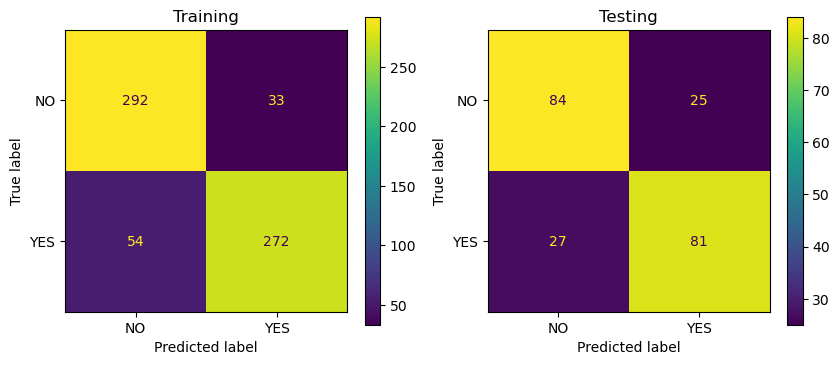

,Precision,Recall,F1 Score,Accuracy
Training,0.89,0.83,0.86,0.87
Testing,0.76,0.75,0.76,0.76


In [187]:
# Decision Tree Classifier:
prediction_train = building_model(model=dec_tree,Xtrain_data=X_train_,X_data=X_train_,Ytrain_data=y_train)

prediction_test = building_model(model=dec_tree,Xtrain_data=X_train_,X_data=X_test_,Ytrain_data=y_train)

classification_confusion_matrix(fig=(10,4),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['NO', 'YES'])

performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,
                       Ytrain_data=y_train)

- Model Overfits and performs better on training than on the testing set.

#### K Nearest Neighbour Classifier

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       325
           1       0.80      0.82      0.81       326

    accuracy                           0.81       651
   macro avg       0.81      0.81      0.81       651
weighted avg       0.81      0.81      0.81       651

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       109
           1       0.71      0.76      0.74       108

    accuracy                           0.73       217
   macro avg       0.73      0.73      0.73       217
weighted avg       0.73      0.73      0.73       217



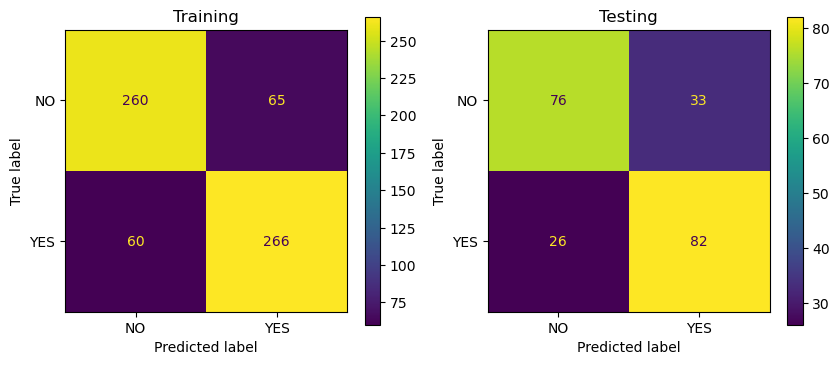

,Precision,Recall,F1 Score,Accuracy
Training,0.80,0.82,0.81,0.81
Testing,0.71,0.76,0.74,0.73


In [188]:
# K Nearest Neighbour Classifier:
prediction_train = building_model(model=knn_class,Xtrain_data=X_train_,X_data=X_train_,Ytrain_data=y_train)

prediction_test = building_model(model=knn_class,Xtrain_data=X_train_,X_data=X_test_,Ytrain_data=y_train)

classification_confusion_matrix(fig=(10,4),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['NO', 'YES'])

performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,
                       Ytrain_data=y_train)

- Model not generalizing well and slightly overfits.

Overall, Logistic Regression model performs better than the other algorithms with a recall of 82%, meaning it better identifies whether a patient will respond positively to the application of either DRUG or CONTROL.

#### Attempting Hyperparameter Tuning with GridSearchCV:

Applying GridSearchCV to the logistic regression model:

In [199]:
log_reg1 = LogisticRegression()

# set the parameters to tune
param_grid = {'penalty': ['l1', 'l2'],'C': [0.1, 1, 10, 100],'solver': ['liblinear', 'saga']}

# instantiate the models and grid search
grid = GridSearchCV(log_reg1, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(X_train_, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [200]:
grid.best_score_

0.8281118881118881

In [201]:
# Finding the best parameters:
best_params = grid.best_params_
best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       325
           1       0.77      0.83      0.80       326

    accuracy                           0.79       651
   macro avg       0.79      0.79      0.79       651
weighted avg       0.79      0.79      0.79       651

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       109
           1       0.75      0.84      0.79       108

    accuracy                           0.78       217
   macro avg       0.79      0.78      0.78       217
weighted avg       0.79      0.78      0.78       217



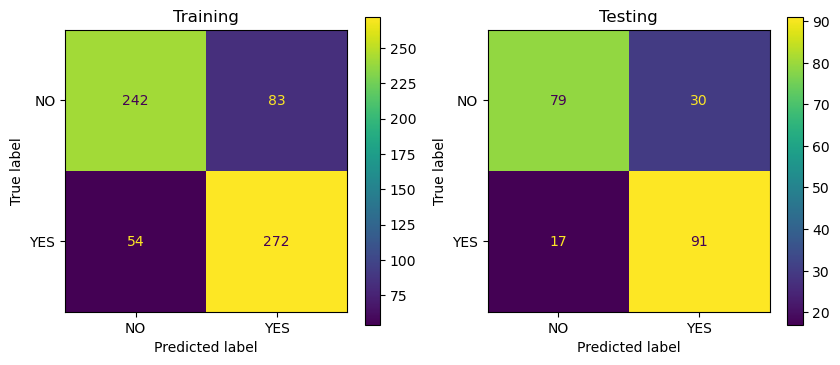

,Precision,Recall,F1 Score,Accuracy
Training,0.77,0.83,0.80,0.79
Testing,0.75,0.84,0.79,0.78


In [202]:
# Applying the best parameters:
log_reg1 = LogisticRegression(**best_params, random_state=0)

# Logistic Regression:
prediction_train = building_model(model=log_reg1,Xtrain_data=X_train_,X_data=X_train_,Ytrain_data=y_train)

prediction_test = building_model(model=log_reg1,Xtrain_data=X_train_,X_data=X_test_,Ytrain_data=y_train)

classification_confusion_matrix(fig=(10,4),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['NO', 'YES'])

performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,
                       Ytrain_data=y_train)

- Model recall value increased.

### MODEL PERFORMANCE SUMMARY:

- Although Logistic Regression performed well in identifying whether or not a patient responds, it had about 84% recall, which means it has the tendency to misclassify patience response 16% of the time, hereas they did not respond.
- It is highly recommended that the model be improved upon for better performance or more test carried out on patient to determine their response to the treatment.